<a href="https://colab.research.google.com/github/RummanAli/FYP2022-KnowledgeVision/blob/main/MNIST_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Code for MNIST ResNet Classification***

## *Importing Libraries*

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## *Importing Dataset MNIST*

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Image Pixel Range Simplification

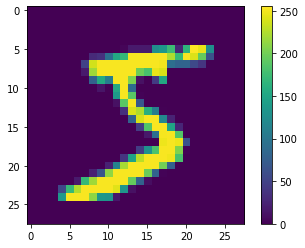

In [3]:
# Current Condition

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Correction to range of 0-1

train_images = train_images/255.0
test_imaegs = test_images/255.0


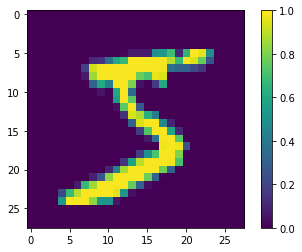

In [5]:
# Updated Condition

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Verifying Training data

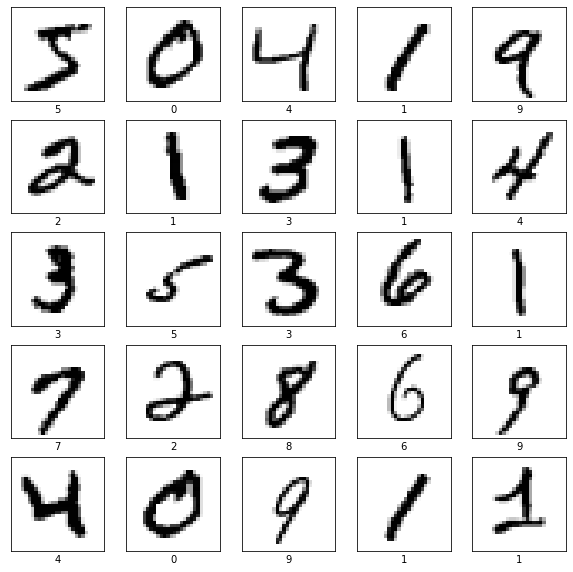

In [6]:
# Verifying Training data

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

## *Build Model*

In [7]:
print(train_images.shape[1:])

(28, 28)


In [8]:
# TRIED SEQUENTIAL MODEL BUT COULDN'T Comprehend a way to Add Skip Connector ( ADD LAYER)

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#model.add(tf.keras.layers.Dense(32,activation='relu'))
#model.add(tf.keras.layers.Dense(64,activation='relu'))
#model.add(tf.keras.layers.Dense(32))
#model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
#model.add(tf.keras.layers.Dense(10))

# USED This NOTATION To use ADD LAYER

model_in = tf.keras.layers.Input((28,28))

model = tf.keras.layers.Flatten()(model_in)

model_copy = tf.keras.layers.Dense(32,activation='relu')(model)
model = tf.keras.layers.Dense(64,activation='relu')(model_copy)
model = tf.keras.layers.Dense(32)(model)
model = tf.keras.layers.Add()([model,model_copy])
model = tf.keras.layers.Activation(tf.keras.activations.relu)(model)
model_out = tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)(model)
model = tf.keras.Model(inputs=model_in, outputs=model_out)

## *Compile Model*

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


## *Training Model*

In [10]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9111
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1551 - accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1181 - accuracy: 0.9635
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1001 - accuracy: 0.9689
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9782
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0604 - accuracy: 0.9808
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9819
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accurac

## *Evaluate Model according to Test Dataset*

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 0s - loss: 24.0208 - accuracy: 0.9666

Test accuracy: 0.9666000008583069


## **Prediction by Model**

In [12]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

## *First 20 test samples predicted* **bold text**

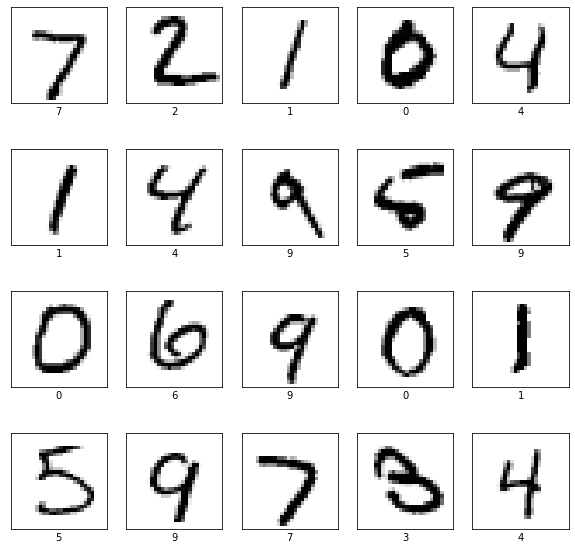

In [13]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel(np.argmax(predictions[i]))